# Desafio Sprint 3 
## Nessa sprint utilizarei o Banco de dados google play store que foi disponibilizado 



# Primeira Etapa 
-----------------------------------------------------------------------------------------------
Criar um gráfico de barras contendo o top 5 apps mais instalados

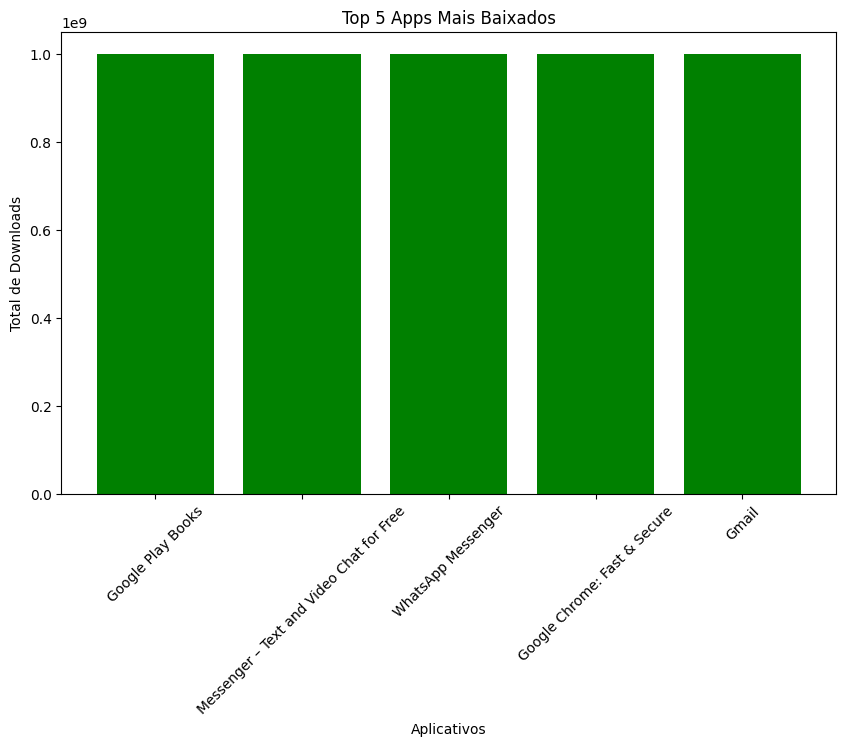

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline  

data_f = pd.read_csv("C:\\Users\\Vikto\\Downloads\\googleplaystore.csv")

data_f = data_f.drop_duplicates()

data_f = data_f[data_f['Installs'].str.contains(r'^\d', regex=True)]

data_f['Installs'] = data_f['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

top_apps = data_f.nlargest(5, 'Installs')

plt.figure(figsize=(10, 6))
plt.bar(top_apps['App'], top_apps['Installs'], color='Green')
plt.title('Top 5 Apps Mais Baixados')
plt.xlabel('Aplicativos')
plt.ylabel('Total de Downloads')
plt.xticks(rotation=45)

plt.show()


# Explicação do Código para Visualização dos Apps Mais Baixados

Este código realiza uma análise e visualização dos aplicativos mais baixados em um dataset do Google Play.

1. **Carregamento e Limpeza de Dados**: 
   Carrega o arquivo CSV e remove as duplicatas para garantir dados únicos. Em seguida, filtra a coluna "Installs" para possuir apenas valores numéricos.

2. **Formatação dos Downloads**:
   Na coluna "Installs", caracteres como `,` e `+` são removidos, e os valores são convertidos para números.

3. **Seleção dos Principais Aplicativos**:
   O código identifica os cinco aplicativos com o maior número de downloads para análise.

# Segunda Etapa
--------------------------------------------------------------------------------------------------
Criar um gráfico de pizza com as categorias presentes no dataset, de acordo com sua frequencia 
eu acabei agrupando algumas categorias para o gráfico não ficar tão poluido 

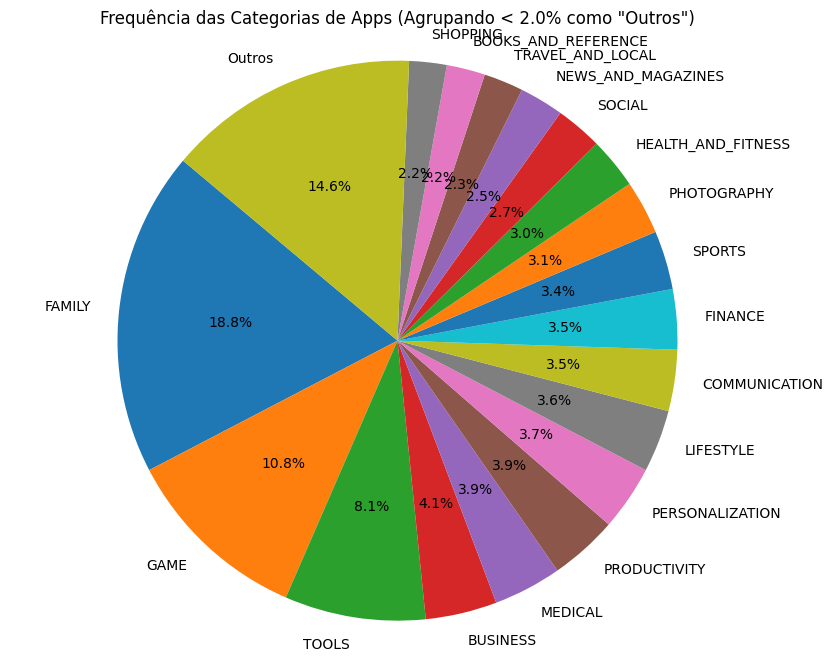

In [22]:
import matplotlib.pyplot as plt

contagem_categorias = df['Category'].value_counts()
percentual_categorias = contagem_categorias / contagem_categorias.sum() * 100

categorias_agrupadas = percentual_categorias[percentual_categorias >= 2.0]
categorias_agrupadas['Outros'] = percentual_categorias[percentual_categorias < 2.0].sum()

plt.figure(figsize=(10, 8))
plt.pie(categorias_agrupadas, labels=categorias_agrupadas.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequência das Categorias de Apps (Agrupando < 2.0% como "Outros")')
plt.axis('equal')
plt.show()



# Explicação do Código para Visualização das Categorias de Apps

O código analisa a distribuição das categorias de aplicativos no dataset e gera um gráfico de pizza para visualização.

1. **Contagem e Cálculo Percentual das Categorias**:
   Conta a frequência de cada categoria no dataset e calcula o percentual correspondente.

2. **Agrupamento de Categorias Menores**:
   As categorias que representam menos de 2% do total são agrupadas em uma nova categoria chamada "Outros", para que o gráfico não fique poluído

3. **Criação do Gráfico de Pizza**:
   Um gráfico de pizza exibe a distribuição percentual das categorias, incluindo a categoria "Outros" para aquelas com baixa frequencia 

# Terceira Etapa
--------------------------------------------------------------------------------------------------
Mostrar o app mais caro do dataset

In [ ]:
import pandas as pd

data_f = pd.read_csv("C:\\Users\\Vikto\\Downloads\\googleplaystore.csv")

data_f = data_f.drop_duplicates()

data_f['Preço'] = data_f['Price'].replace({'\$': ''}, regex=True)

data_f = data_f[data_f['Preço'].str.replace('.', '', regex=False).str.isnumeric()]

data_f['Preço'] = data_f['Preço'].astype(float)

aplicativo_mais_caro = data_f.loc[data_f['Preço'].idxmax()]

print("Aplicativo mais caro:")
print(f"Nome: {aplicativo_mais_caro['App']}")
print(f"Preço: R${aplicativo_mais_caro['Preço']:.2f}")
print(f"Gênero: {aplicativo_mais_caro['Category']}")

Aplicativo mais caro:
Nome: I'm Rich - Trump Edition
Preço: R$400.00
Gênero: LIFESTYLE


# Explicação do Código para Encontrar o App Mais Caro

Este código realiza uma análise para encontrar o aplicativo mais caro em um dataset 

1. **Carregamento e Limpeza de Dados**:
   Carrega o arquivo CSV e remove duplicatas para garantir que cada aplicativo apareça apenas uma vez. Em seguida, remove o símbolo `$` da coluna de preços para deixar apenas valores numéricos.

2. **Filtragem e Conversão de Preços**:
   Filtra para manter somente valores numéricos na coluna de preço e, em seguida, converte esses valores para o tipo `float`, permitindo comparar os preços.

3. **Identificação do Aplicativo Mais Caro**:
   Localiza o aplicativo com o preço mais alto no dataset e exibe seu nome, preço e categoria.

# Quarta etapa
--------------------------------------------------------------------------------------------------
Mostrar quantos app's classicados como "Mature + 17" existem no dataset

In [ ]:
import pandas as pd

data_f = pd.read_csv("C:\\Users\\Vikto\\Downloads\\googleplaystore.csv")

data_f = data_f.drop_duplicates()

num_aplicativos_maduros = data_f[data_f['Content Rating'] == 'Mature 17+'].shape[0]

print(f"Número de aplicativos classificados como 'Mature 17+': {num_aplicativos_maduros}")

Número de aplicativos classificados como 'Mature 17+': 447


# Explicação do Código para Contar Apps com Classificação "Mature 17+"

Este código verifica quantos aplicativos no dataset são classificados como "Mature 17+".

1. **Carregamento e Limpeza de Dados**:
   O código carrega o arquivo CSV e remove duplicatas para evitar contagens repetidas.

2. **Contagem de Apps "Mature 17+"**:
   Filtra o dataset para encontrar somente os aplicativos com a classificação "Mature 17+" e conta quantos são.

3. **Exibição do Resultado**:
   Exibe o total de aplicativos classificados como "Mature 17+".

# Quinta etapa 
--------------------------------------------------------------------------------------------------
Mostrar o top 10 Apps por numero de reviews

In [ ]:
import pandas as pd

data_f = pd.read_csv("C:\\Users\\Vikto\\Downloads\\googleplaystore.csv")

data_f = data_f.drop_duplicates()

data_f['Reviews'] = pd.to_numeric(data_f['Reviews'], errors='coerce')

data_f = data_f.dropna(subset=['Reviews'])

reviews_agrupadas = data_f.groupby('App')['Reviews'].max().reset_index()

top_10_reviews = reviews_agrupadas.nlargest(10, 'Reviews')

print("Top 10 Apps por Número de Reviews :")
print(top_10_reviews[['App', 'Reviews']].to_string(index=False))


Top 10 Apps por Número de Reviews :
                                               App    Reviews
                                          Facebook 78158306.0
                                WhatsApp Messenger 69119316.0
                                         Instagram 66577446.0
          Messenger – Text and Video Chat for Free 56646578.0
                                    Clash of Clans 44893888.0
           Clean Master- Space Cleaner & Antivirus 42916526.0
                                    Subway Surfers 27725352.0
                                           YouTube 25655305.0
Security Master - Antivirus, VPN, AppLock, Booster 24900999.0
                                      Clash Royale 23136735.0


# Explicação do Código para Encontrar os Top 10 Apps com Mais Reviews

Este código analisa o dataset para identificar os 10 aplicativos com o maior número de reviews.

1. **Carregamento e Limpeza de Dados**:
   Carrega o dataset e remove duplicatas para evitar contagens repetidas. Em seguida, converte a coluna `Reviews` para valores numéricos, substituindo entradas inválidas por `NaN` e removendo essas linhas.

2. **Agrupamento e Seleção do Maior Número de Reviews**:
   Agrupa o dataset por aplicativo, mantendo o maior número de reviews de cada app para evitar contagem duplicada de reviews por app.

3. **Identificação dos 10 Apps com Mais Reviews**:
   Seleciona os 10 aplicativos com o maior número de reviews.

4. **Exibição do Resultado**:
   Exibe uma lista com o nome dos aplicativos e o total de reviews para os 10 mais avaliados.

# Sexta etapa parte 1
--------------------------------------------------------------------------------------------------
Criar dois calculos sobre o data set no formato lista e valor

In [ ]:
import pandas as pd

data_f = pd.read_csv("C:\\Users\\Vikto\\Downloads\\googleplaystore.csv")

data_f = data_f.drop_duplicates()


data_f['Price'] = data_f['Price'].replace({'\$': '', 'Everyone': None}, regex=True).astype(float)

data_f = data_f[data_f['Price'].notna()]

apps_mais_caros = data_f.loc[data_f.groupby('Category')['Price'].idxmax()]

print("Aplicativos Mais Caros por Categoria:")
print(apps_mais_caros[['Genres', 'App', 'Price']].to_string(index=False))

Aplicativos Mais Caros por Categoria:
                 Genres                                                App  Price
           Art & Design  X Launcher Pro: PhoneX Theme, OS11 Control Center   1.99
        Auto & Vehicles                      FORD V SERIES CALC - NO LIMIT   9.99
                 Beauty                         Hush - Beauty for Everyone   0.00
      Books & Reference                     FN pistol model 1903 explained   6.49
               Business                                            Lean EQ  89.99
                 Comics                         LINE WEBTOON - Free Comics   0.00
          Communication                                            Z PIVOT  19.99
                 Dating AMBW Dating App: Asian Men Black Women Interracial   7.99
    Education;Education             Fuzzy Numbers: Pre-K Number Foundation   5.99
          Entertainment                                     My Talking Pet   4.99
                 Events                            BP Fitnes

# Explicação do Código para Encontrar os Apps Mais Caros por Categoria

Nesse código eu decidi analisar o dataset para identificar o aplicativo mais caro de cada categoria.

1. **Carregamento e Limpeza de Dados**:
   Carrega o arquivo CSV e remove duplicatas para evitar entradas repetidas. A coluna `Price` é então limpa, removendo o símbolo `$` e substituindo valores inválidos como "Everyone" por `None`, antes de converter os valores para `float`.

2. **Filtragem de Valores Não Nulos**:
   Mantém apenas os registros onde o preço é um valor numérico, ou seja, remove apps gratuitos ou com informações de preço inválidas.

3. **Seleção dos Apps Mais Caros por Categoria**:
   Agrupa o dataset por categoria e seleciona o aplicativo mais caro em cada uma delas.

4. **Exibição do Resultado**:
   Exibe uma lista com as categorias, nomes dos aplicativos e seus respectivos preços, destacando o mais caro em cada categoria.

# Sexta etapa parte 2 
--------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd

data_f = pd.read_csv("C:\\Users\\Vikto\\Downloads\\googleplaystore.csv")

data_f = data_f.drop_duplicates()

data_f['Reviews'] = pd.to_numeric(data_f['Reviews'], errors='coerce')

Media_reviwe_por_categoria = data_f.groupby('Category')['Reviews'].mean().reset_index()

Maior_media_review = Media_reviwe_por_categoria.loc[Media_reviwe_por_categoria['Reviews'].idxmax()]

print(f"A categoria com a maior média de avaliações é '{Maior_media_review['Category']}' com uma média de {Maior_media_review['Reviews']:.1f} avaliações.")


A categoria com a maior média de avaliações é 'SOCIAL' com uma média de 1905631.5 avaliações.


# Explicação do Código para Encontrar a Categoria com a Maior Média de Avaliações

Nesse código eu decidi calcular a média de avaliações para cada categoria de aplicativo no dataset e identifica a categoria com a maior média.

1. **Carregamento e Limpeza de Dados**:
   Carrega o dataset e remove duplicatas para evitar contagens repetidas. Converte a coluna `Reviews` para valores numéricos, substituindo entradas inválidas por `NaN`.

2. **Cálculo da Média de Avaliações por Categoria**:
   Agrupa os dados por categoria e calcula a média de avaliações (`Reviews`) para cada uma.

3. **Identificação da Categoria com a Maior Média de Avaliações**:
   Identifica qual categoria possui a maior média de avaliações.

4. **Exibição do Resultado**:
   Exibe a categoria com a maior média de avaliações, juntamente com o valor médio arredondado.


# Setima parte
--------------------------------------------------------------------------------------------------
Criar duas formas gráficas, dos calculos realizados anteriormente

A categoria com a maior média de avaliações é 'SOCIAL' com uma média de 1905631.5 avaliações.


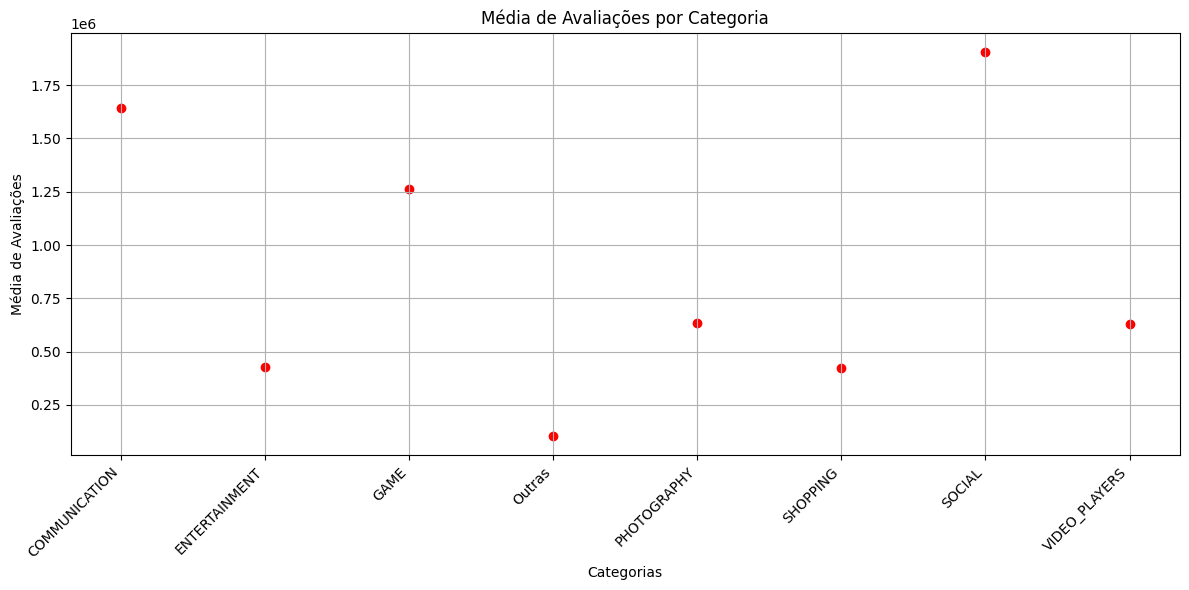

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_f = pd.read_csv("C:\\Users\\Vikto\\Downloads\\googleplaystore.csv")

data_f = data_f.drop_duplicates()

data_f['Avaliacoes'] = pd.to_numeric(data_f['Reviews'], errors='coerce')

media_avaliacoes_por_categoria = data_f.groupby('Category')['Avaliacoes'].mean().reset_index()

media_avaliacoes_por_categoria['Category'] = media_avaliacoes_por_categoria['Category'].where(media_avaliacoes_por_categoria['Avaliacoes'] >= 360000.00, 'Outras')

media_avaliacoes_agrupadas = media_avaliacoes_por_categoria.groupby('Category')['Avaliacoes'].mean().reset_index()

maior_media_avaliacoes = media_avaliacoes_agrupadas.loc[media_avaliacoes_agrupadas['Avaliacoes'].idxmax()]

print(f"A categoria com a maior média de avaliações é '{maior_media_avaliacoes['Category']}' com uma média de {maior_media_avaliacoes['Avaliacoes']:.1f} avaliações.")

plt.figure(figsize=(12, 6))
plt.scatter(media_avaliacoes_agrupadas['Category'], media_avaliacoes_agrupadas['Avaliacoes'], color='Red')
plt.title('Média de Avaliações por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Média de Avaliações')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explicação do Código para Análise da Média de Avaliações por Categoria

Este código calcula a média de avaliações para cada categoria de aplicativo no dataset e visualiza os resultados em um gráfico de dispersão.

1. **Carregamento e Limpeza de Dados**:
   Carrega o arquivo CSV e remove duplicatas para evitar entradas repetidas. Converte a coluna `Reviews` para um formato numérico, tratando entradas inválidas como `NaN`.

2. **Cálculo da Média de Avaliações por Categoria**:
   Agrupa os dados por categoria e calcula a média de avaliações. As categorias com média inferior a 360.000 são agrupadas sob a designação "Outras".

3. **Identificação da Categoria com a Maior Média de Avaliações**:
   Determina qual categoria tem a maior média de avaliações e armazena essa informação.

4. **Exibição do Resultado**:
   Imprime a categoria com a maior média de avaliações e o valor médio correspondente.

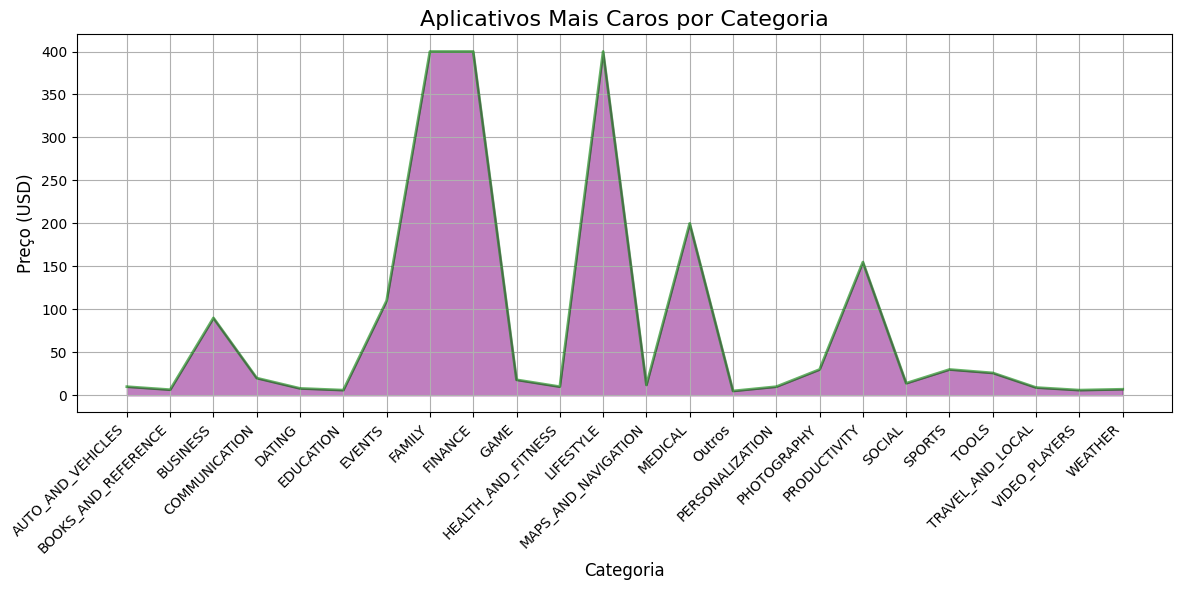

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_f = pd.read_csv("C:\\Users\\Vikto\\Downloads\\googleplaystore.csv")

data_f = data_f.drop_duplicates()

data_f['Preço'] = data_f['Price'].replace({'\$': '', 'Everyone': None}, regex=True).astype(float)

data_f = data_f[data_f['Preço'].notna()]

apps_mais_caros = data_f.loc[data_f.groupby('Category')['Preço'].idxmax()]

apps_mais_caros['Category'] = apps_mais_caros['Category'].where(apps_mais_caros['Preço'] > 5, 'Outros')

apps_mais_caros = apps_mais_caros.groupby('Category', as_index=False).agg({'Preço': 'max'})

plt.figure(figsize=(12, 6))
plt.fill_between(apps_mais_caros['Category'], apps_mais_caros['Preço'], color='Purple', alpha=0.5)
plt.plot(apps_mais_caros['Category'], apps_mais_caros['Preço'], color='Green', alpha=0.6, linewidth=2)

plt.title('Aplicativos Mais Caros por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Preço (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(visible=True)

plt.tight_layout()
plt.show()

# Explicação do Código para Visualização dos Aplicativos Mais Caros por Categoria

Este código analisa e visualiza os aplicativos mais caros de cada categoria no dataset

1. **Carregamento e Limpeza de Dados**:
   O arquivo CSV é carregado e duplicatas são removidas. A coluna `Price` é limpa, removendo o símbolo `$` e substituindo valores como "Everyone" por `None`. Os preços são então convertidos para o formato `float`.

2. **Filtragem de Valores Válidos**:
   Apenas os aplicativos com preços válidos (não nulos) são mantidos para a análise.

3. **Identificação dos Aplicativos Mais Caros por Categoria**:
   O código identifica o aplicativo mais caro dentro de cada categoria. Além disso, as categorias com aplicativos que têm preços superiores a 5 dólares são mantidas; as demais são agrupadas sob a categoria "Outros".

4. **Agrupamento e Preparação dos Dados**:
   Os dados são agrupados por categoria, mantendo o preço máximo encontrado em cada uma.
